# Incidents responded to by Fire comapnies in NYC 
In this project, I worked on the dataset "incidents responded to by Fire companies", downloaded from NYC open data. The dataset contains information about type of incident, date and time of the incident, date and time when FDNY arrived, the number of units on scene, when was the last unit cleared, actions taken, borough and zip code of the incidents and whether detectors were present or not. 
I tried to answer the following questions:

- What is the most frequent incident? per year? per borough? Is the proportion of incidents the same for each year and borough?

- How long does it take for FDNY people to arrive to an incident?

- Between midnight and 4AM, what indcidents are most frequent? How many units are sent to these incidents? and in which borough they are most likely to happen?

- Is there any correlation between the time fdny arrives and the borough the incident has happened in? 

- Is there any correlation between incidents that take more than 60 minutes and the presence or absence of CO detector?

- Finally, I tried to predict the number of units an incident needs to be resolved based on the information from the other columns.
    
    

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

In [2]:
df = pd.read_csv("Incidents_Responded_to_by_Fire_Companies.csv", low_memory = False)
df.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
0,55672688,2147,"300 - Rescue, EMS incident, other",01/01/2013 12:00:20 AM,01/01/2013 12:14:23 AM,1.0,01/01/2013 12:20:06 AM,"1 - More than initial alarm, less than Signal 7-5",1186.0,"00 - Action taken, other",...,10454,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55672692,0818,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:00:37 AM,01/01/2013 12:09:03 AM,3.0,01/01/2013 12:30:06 AM,"1 - More than initial alarm, less than Signal 7-5",1769.0,86 - Investigate,...,10036,1 - Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55672693,9656,"300 - Rescue, EMS incident, other",01/01/2013 12:01:17 AM,01/01/2013 12:04:55 AM,1.0,01/01/2013 12:15:18 AM,"1 - More than initial alarm, less than Signal 7-5",841.0,"00 - Action taken, other",...,11418,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55672695,7412,412 - Gas leak (natural gas or LPG),01/01/2013 12:02:32 AM,01/01/2013 12:07:48 AM,4.0,01/01/2013 12:40:11 AM,"1 - More than initial alarm, less than Signal 7-5",2259.0,44 - Hazardous materials leak control & contai...,...,11103,5 - Queens,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55672697,4019,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:01:49 AM,01/01/2013 12:06:27 AM,6.0,01/01/2013 12:24:56 AM,"1 - More than initial alarm, less than Signal 7-5",1387.0,86 - Investigate,...,11385,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(2277779, 24)

In [4]:
df.columns

Index(['IM_INCIDENT_KEY', 'FIRE_BOX', 'INCIDENT_TYPE_DESC',
       'INCIDENT_DATE_TIME', 'ARRIVAL_DATE_TIME', 'UNITS_ONSCENE',
       'LAST_UNIT_CLEARED_DATE_TIME', 'HIGHEST_LEVEL_DESC',
       'TOTAL_INCIDENT_DURATION', 'ACTION_TAKEN1_DESC', 'ACTION_TAKEN2_DESC',
       'ACTION_TAKEN3_DESC', 'PROPERTY_USE_DESC', 'STREET_HIGHWAY', 'ZIP_CODE',
       'BOROUGH_DESC', 'FLOOR', 'CO_DETECTOR_PRESENT_DESC',
       'FIRE_ORIGIN_BELOW_GRADE_FLAG', 'STORY_FIRE_ORIGIN_COUNT',
       'FIRE_SPREAD_DESC', 'DETECTOR_PRESENCE_DESC', 'AES_PRESENCE_DESC',
       'STANDPIPE_SYS_PRESENT_FLAG'],
      dtype='object')

In [5]:
df.isna().sum()

IM_INCIDENT_KEY                       0
FIRE_BOX                              9
INCIDENT_TYPE_DESC                    0
INCIDENT_DATE_TIME                    0
ARRIVAL_DATE_TIME                 55218
UNITS_ONSCENE                     55412
LAST_UNIT_CLEARED_DATE_TIME           2
HIGHEST_LEVEL_DESC                  139
TOTAL_INCIDENT_DURATION             136
ACTION_TAKEN1_DESC                    0
ACTION_TAKEN2_DESC              1797081
ACTION_TAKEN3_DESC              2055727
PROPERTY_USE_DESC                     6
STREET_HIGHWAY                    38157
ZIP_CODE                              8
BOROUGH_DESC                          0
FLOOR                           1790372
CO_DETECTOR_PRESENT_DESC        2248104
FIRE_ORIGIN_BELOW_GRADE_FLAG    2275870
STORY_FIRE_ORIGIN_COUNT         2264660
FIRE_SPREAD_DESC                2264661
DETECTOR_PRESENCE_DESC          2264662
AES_PRESENCE_DESC               2264662
STANDPIPE_SYS_PRESENT_FLAG      2264658
dtype: int64

Last columns are almost all missing values. For any analysis later, it will be best to completely remove these columns

__Check for duplicates__

Just to make sure there are no duplicates in the dataset, we use drop_duplicates function and then check the shape of the dataset to see if it is different from the original dataset. 

In [6]:
df.drop_duplicates(inplace=True)
df.shape

(2277779, 24)

__Data Exploration__

Now we are going to explore the features of the dataset. We are going to start with INCIDENT_TYPE_DESC column

In [7]:
df.INCIDENT_TYPE_DESC.nunique()

182

We're gonna count the 10 most frequent incidents in the dataset and illustrate it with a seaborn countplot.

[Text(0,0,'300 - Rescue, EMS incident, other'),
 Text(0,0,'651 - Smoke scare, odor of smoke'),
 Text(0,0,'353 - Removal of victim(s) from stalled elevator'),
 Text(0,0,'710 - Malicious, mischievous false call, other'),
 Text(0,0,'522 - Water or steam leak'),
 Text(0,0,'412 - Gas leak (natural gas or LPG)'),
 Text(0,0,'735A - Unwarranted alarm/defective condition of alarm system'),
 Text(0,0,'113 - Cooking fire, confined to container'),
 Text(0,0,'555 - Defective elevator, no occupants'),
 Text(0,0,'736 - CO detector activation due to malfunction')]

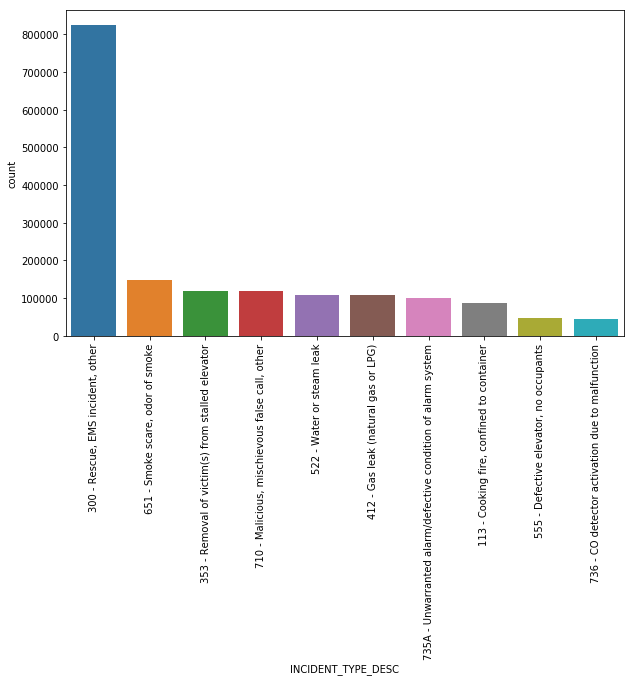

In [16]:
plt.figure(figsize = (10, 6))
g = sns.countplot(x = df.INCIDENT_TYPE_DESC, data = df, 
             order=df.INCIDENT_TYPE_DESC.value_counts().iloc[:10].index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

The code "300 - Rescue, EMS incident, Other" is the most frequent incident for teh whole dataset

Next, we convert date columns to datetime objects

In [ ]:
df['INCIDENT_DATE_TIME'] = pd.to_datetime(df['INCIDENT_DATE_TIME'], errors = 'coerce')
df['ARRIVAL_DATE_TIME'] = pd.to_datetime(df['ARRIVAL_DATE_TIME'], errors='coerce')
df['LAST_UNIT_CLEARED_DATE_TIME'] = pd.to_datetime(df['LAST_UNIT_CLEARED_DATE_TIME'], errors='coerce')

Let's save the dataset for now

In [ ]:
df.to_pickle("./df_datesConverted.pkl")

In [137]:
df = pd.read_pickle("df_datesConverted.pkl")

Which year has seen highest number of incidents?

In [4]:
df.INCIDENT_DATE_TIME.dt.year.value_counts()

2015    484874
2016    478441
2017    468355
2014    440526
2013    405583
Name: INCIDENT_DATE_TIME, dtype: int64

Let's plot this

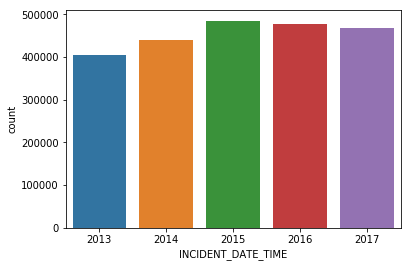

In [19]:
sns.countplot(x = df.INCIDENT_DATE_TIME.dt.year, data = df)

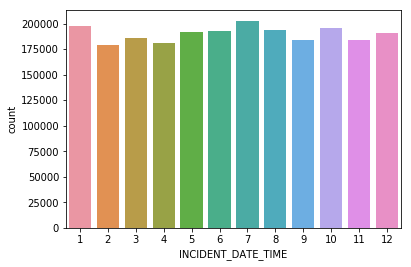

In [22]:
sns.countplot(x = df.INCIDENT_DATE_TIME.dt.month, data = df)

July is the busiest month for FDNY

Curious about knowing if the proportion of 5 most frequent incidents is the same for every year

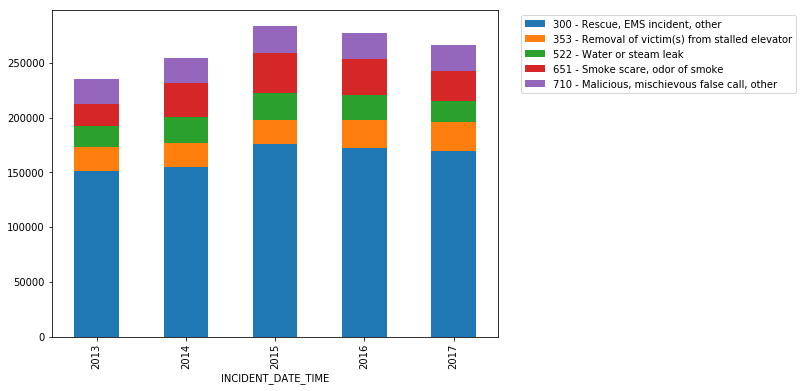

In [13]:
year_type = df.groupby([df.INCIDENT_DATE_TIME.dt.year , df.loc[df.INCIDENT_TYPE_DESC.isin(df.INCIDENT_TYPE_DESC.value_counts().iloc[:5].index),
                   "INCIDENT_TYPE_DESC"]]).count()["FIRE_BOX"].unstack()
year_type.plot(kind='bar', stacked=True, figsize = (8,6))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

The proportions look the same for different years. Only 1n 2013, the incident "Smoke scare, odor of smoke" is less frequent compared to the other years

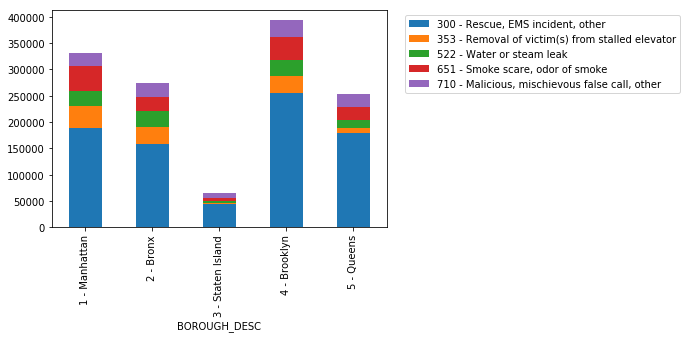

In [14]:
borough_type = df.groupby(["BOROUGH_DESC", df.loc[df.INCIDENT_TYPE_DESC.isin(df.INCIDENT_TYPE_DESC.value_counts().iloc[:5].index),
                   "INCIDENT_TYPE_DESC"]]).count()["FIRE_BOX"].unstack()
borough_type.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

It seems in Queens, people are less likely to get trapped inside an elevator compared with other boroughs

In [138]:
from datetime import datetime
from datetime import timedelta

In [139]:
def duration(date1, date2):
    return (date2 - date1).astype('timedelta64[s]')/60

In [140]:
minutes = duration(df["INCIDENT_DATE_TIME"], 
                      df["ARRIVAL_DATE_TIME"])

In [135]:
minutes.describe()

count    2.222560e+06
mean     5.091810e+00
std      1.215225e+01
min     -5.393333e+01
25%      3.633333e+00
50%      4.566667e+00
75%      5.733333e+00
max      1.000497e+04
dtype: float64

Weird. The minimum value is negative. How is it possible for an incident to happen after the FDNY people have arrived?

In [141]:
minutes.idxmin()

1736475

In [142]:
df.iloc[1736475]

IM_INCIDENT_KEY                                                          60580274
FIRE_BOX                                                                     2851
INCIDENT_TYPE_DESC                              300 - Rescue, EMS incident, other
INCIDENT_DATE_TIME                                            2016-11-06 01:56:40
ARRIVAL_DATE_TIME                                             2016-11-06 00:11:58
UNITS_ONSCENE                                                                   1
LAST_UNIT_CLEARED_DATE_TIME                                   2016-11-06 02:08:02
HIGHEST_LEVEL_DESC              1 - More than initial alarm, less than Signal 7-5
TOTAL_INCIDENT_DURATION                                                       682
ACTION_TAKEN1_DESC                                       00 - Action taken, other
ACTION_TAKEN2_DESC                                                            NaN
ACTION_TAKEN3_DESC                                                            NaN
PROPERTY_USE_DES

Maybe the arrival time and the incident date time are mistakenly swaped. It might be safe to remove this instance.

In [143]:
df.drop(1736475, inplace=True)
minutes.drop(1736475, inplace=True)

In [144]:
minutes.describe()

count    2.222560e+06
mean     5.091810e+00
std      1.215225e+01
min     -5.393333e+01
25%      3.633333e+00
50%      4.566667e+00
75%      5.733333e+00
max      1.000497e+04
dtype: float64

Looks like there are more negative values. Let's see how many, and remove them from our dataset

In [26]:
minutes[minutes < 0].count()

12

In [27]:
minutes[minutes < 0].index

Int64Index([ 340366,  775324,  775343,  775345,  775348, 1254483, 1254521,
            1254525, 1254526, 1736477, 2204022, 2204023],
           dtype='int64')

In [145]:
df.drop(minutes[minutes < 0].index, inplace=True)
minutes.drop(minutes[minutes < 0].index, inplace=True)

In [29]:
df.shape

(2277766, 24)

In [30]:
minutes.describe()

count    2.222548e+06
mean     5.092044e+00
std      1.215181e+01
min      6.666667e-02
25%      3.633333e+00
50%      4.566667e+00
75%      5.733333e+00
max      1.000497e+04
dtype: float64

It took 7 days for FDNY to arrive an incident scene. Let's explore this incident

In [33]:
minutes.idxmax()

313318

In [34]:
df.iloc[313318]

IM_INCIDENT_KEY                                                          56474083
FIRE_BOX                                                                     2853
INCIDENT_TYPE_DESC                 710 - Malicious, mischievous false call, other
INCIDENT_DATE_TIME                                            2013-10-02 03:04:29
ARRIVAL_DATE_TIME                                             2013-10-09 01:49:27
UNITS_ONSCENE                                                                   1
LAST_UNIT_CLEARED_DATE_TIME                                   2013-10-09 01:50:06
HIGHEST_LEVEL_DESC              1 - More than initial alarm, less than Signal 7-5
TOTAL_INCIDENT_DURATION                                                    600337
ACTION_TAKEN1_DESC                                       00 - Action taken, other
ACTION_TAKEN2_DESC                                                            NaN
ACTION_TAKEN3_DESC                                                            NaN
PROPERTY_USE_DES

OK. That was a false call

In [20]:
df_minutes = pd.DataFrame(minutes, columns = ["Minutes"])

how long does it take for FDNY people to arrive to an incident (considering 10 most frequent incident type)

[Text(0,0,'300 - Rescue, EMS incident, other'),
 Text(0,0,'651 - Smoke scare, odor of smoke'),
 Text(0,0,'353 - Removal of victim(s) from stalled elevator'),
 Text(0,0,'710 - Malicious, mischievous false call, other'),
 Text(0,0,'522 - Water or steam leak'),
 Text(0,0,'412 - Gas leak (natural gas or LPG)'),
 Text(0,0,'735A - Unwarranted alarm/defective condition of alarm system'),
 Text(0,0,'113 - Cooking fire, confined to container'),
 Text(0,0,'555 - Defective elevator, no occupants'),
 Text(0,0,'736 - CO detector activation due to malfunction')]

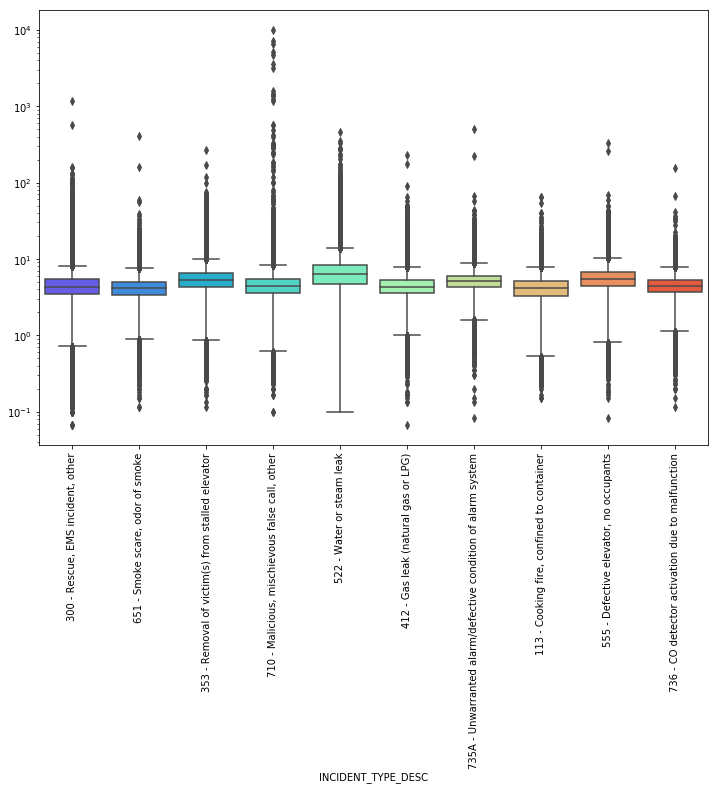

In [21]:
plt.figure(figsize=(12,8))
g = sns.boxplot(x="INCIDENT_TYPE_DESC", y=minutes, data=df,palette='rainbow', 
            order=df.INCIDENT_TYPE_DESC.value_counts().iloc[:10].index)
g.set(yscale="log")
g.set_xticklabels(g.get_xticklabels(), rotation=90)

Let's explore the column HIGHEST_LEVEL_DESC

In [41]:
df.HIGHEST_LEVEL_DESC.value_counts()

1 - More than initial alarm, less than Signal 7-5    2262663
7 - Signal 7-5                                         10886
0 - Initial alarm                                       3115
2 - 2nd alarm                                            713
3 - 3rd alarm                                            150
4 - 4th alarm                                             52
5 - 5th alarm                                             48
Name: HIGHEST_LEVEL_DESC, dtype: int64

The highest level description "1" is a lot more frequent than other levels

In [24]:
df.ACTION_TAKEN1_DESC.value_counts()

00 - Action taken, other                                   1145485
86 - Investigate                                            266992
64 - Shut down system                                       202224
11 - Extinguishment by fire service personnel               147123
44 - Hazardous materials leak control & containment         100694
45 - Remove hazard                                           84880
70 - Assistance, other                                       52878
31 - Provide first aid & check for injuries                  41937
82 - Notify other agencies.                                  36357
48 - Remove hazardous materials                              27045
93 - Cancelled en route                                      23114
21 - Search                                                  20757
302 - Provide Patient Care                                   18895
42 - HazMat detection, monitoring, sampling, & analysis      17666
53 - Evacuate area                                           1

In [25]:
df.loc[df.ACTION_TAKEN1_DESC == "00 - Action taken, other", "ACTION_TAKEN3_DESC"].value_counts().sum()

867

In [26]:
df.loc[df.ACTION_TAKEN1_DESC == "00 - Action taken, other", "ACTION_TAKEN2_DESC"].value_counts().sum()

3197

Not much info about what action is taken. Only for a few instances, there is more description on what action is taken. For the rest, not much information is provided.

In [120]:
df_class.PROPERTY_USE_DESC.value_counts()[0:10]

UUU - Undetermined                                        1319239
429 - Multifamily dwelling                                 445467
419 - 1 or 2 family dwelling                               121051
962 - Residential street, road or residential driveway      93690
960 - Street, other                                         91813
961 - Highway or divided highway                            40390
963 - Street or road in commercial area                     32178
500 - Mercantile, business, other                           20965
400 - Residential, other                                    13714
599 - Business office                                       13237
Name: PROPERTY_USE_DESC, dtype: int64

Let's explore UNITS_ONSCENE column

In [35]:
df.UNITS_ONSCENE.value_counts()

1.0      1324241
2.0       276217
3.0       193219
5.0       144934
6.0       136966
4.0       122910
7.0        10255
8.0         2698
11.0        1795
9.0         1764
12.0        1617
10.0        1605
13.0        1173
14.0         729
15.0         333
16.0         231
17.0         204
18.0         179
19.0         146
20.0         125
21.0         112
24.0          96
22.0          94
23.0          84
26.0          76
25.0          70
27.0          51
28.0          40
29.0          38
30.0          37
          ...   
90.0           3
60.0           3
61.0           3
67.0           2
84.0           2
83.0           2
80.0           2
77.0           2
56.0           2
55.0           2
111.0          2
64.0           2
87.0           2
58.0           2
148.0          1
149.0          1
104.0          1
126.0          1
99.0           1
105.0          1
69.0           1
86.0           1
85.0           1
74.0           1
68.0           1
66.0           1
57.0           1
207.0         

one unit is the most frequent one.

Let's see for which incidents, FDNY has sent more than 100 units.

In [47]:
df.loc[df.UNITS_ONSCENE >= 100, "INCIDENT_TYPE_DESC"]

492107     461 - Building or structure weakened or collapsed
500838                                     100 - Fire, other
884824                      651 - Smoke scare, odor of smoke
892902                                     100 - Fire, other
960053                                   111 - Building fire
1215800                                  111 - Building fire
1377706                    300 - Rescue, EMS incident, other
1727392                                  111 - Building fire
2120585                                  111 - Building fire
2219968                                  111 - Building fire
Name: INCIDENT_TYPE_DESC, dtype: object

And what was the HIGHEST_LEVEL_DESC for these incidents?

In [44]:
df.loc[df.UNITS_ONSCENE >= 100, "HIGHEST_LEVEL_DESC"]

492107                                         5 - 5th alarm
500838                                         4 - 4th alarm
884824                                         5 - 5th alarm
892902     1 - More than initial alarm, less than Signal 7-5
960053                                         5 - 5th alarm
1215800                                        5 - 5th alarm
1377706                                        4 - 4th alarm
1727392                                        5 - 5th alarm
2120585                                        5 - 5th alarm
2219968                                        5 - 5th alarm
Name: HIGHEST_LEVEL_DESC, dtype: object

Only for 10 incidents, the number of units on scene has exceeded 100, and for most of them the highest level description is 5th or 4th alarm.

In [11]:
df.ACTION_TAKEN1_DESC.value_counts()

00 - Action taken, other                                   1145485
86 - Investigate                                            266992
64 - Shut down system                                       202224
11 - Extinguishment by fire service personnel               147123
44 - Hazardous materials leak control & containment         100694
45 - Remove hazard                                           84880
70 - Assistance, other                                       52878
31 - Provide first aid & check for injuries                  41937
82 - Notify other agencies.                                  36357
48 - Remove hazardous materials                              27045
93 - Cancelled en route                                      23114
21 - Search                                                  20757
302 - Provide Patient Care                                   18895
42 - HazMat detection, monitoring, sampling, & analysis      17666
53 - Evacuate area                                           1

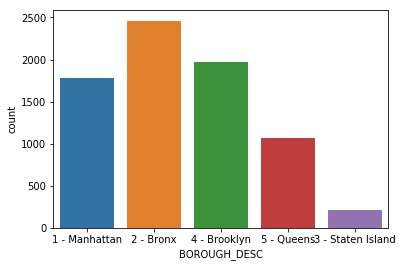

In [18]:
sns.countplot(df.loc[df.ACTION_TAKEN1_DESC == "52 - Forcible entry", "BOROUGH_DESC"])

In [54]:
df.loc[df.ACTION_TAKEN1_DESC == "93 - Cancelled en route", "INCIDENT_TYPE_DESC"].value_counts()

611 - Dispatched & canceled en route               23107
721 - Bomb scare - no bomb                             5
800 - Severe weather or natural disaster, other        2
Name: INCIDENT_TYPE_DESC, dtype: int64

In [56]:
df.loc[df.ACTION_TAKEN1_DESC == "53 - Evacuate area", "INCIDENT_TYPE_DESC"].value_counts()[0:10]

200 - Overpressure rupture, explosion, overheat other    12201
112 - Fires in structure other than in a building         5066
100 - Fire, other                                           21
400 - Hazardous condition, other                            18
445 - Arcing, shorted electrical equipment                  18
440 - Electrical  wiring/equipment problem, other           17
353 - Removal of victim(s) from stalled elevator            13
600 - Good intent call, other                               13
721 - Bomb scare - no bomb                                  12
461 - Building or structure weakened or collapsed           12
Name: INCIDENT_TYPE_DESC, dtype: int64

In [67]:
action_borough = df.groupby(["BOROUGH_DESC", df.loc[df.ACTION_TAKEN1_DESC.isin(["93 - Cancelled en route", "53 - Evacuate area",
                                               "52 - Forcible entry"]), "ACTION_TAKEN1_DESC"]]).count()["FIRE_BOX"].unstack()

In [68]:
action_borough

ACTION_TAKEN1_DESC,52 - Forcible entry,53 - Evacuate area,93 - Cancelled en route
BOROUGH_DESC,,,
1 - Manhattan,1783,4149,5441
2 - Bronx,2460,1892,5068
3 - Staten Island,208,93,1171
4 - Brooklyn,1973,6916,7237
5 - Queens,1069,4475,4197


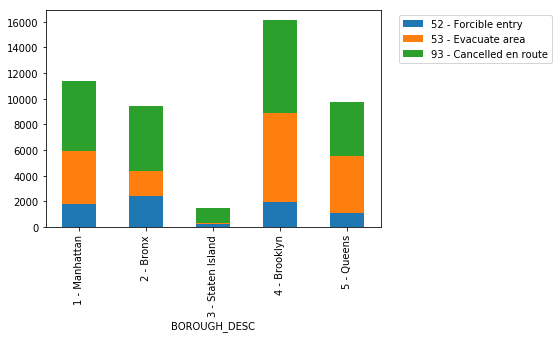

In [70]:
action_borough.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [40]:
df.groupby([df.loc[df.INCIDENT_TYPE_DESC == "710 - Malicious, mischievous false call, other", 
       "INCIDENT_DATE_TIME"].dt.year, "BOROUGH_DESC"]).count()["FIRE_BOX"].unstack()

BOROUGH_DESC,1 - Manhattan,2 - Bronx,3 - Staten Island,4 - Brooklyn,5 - Queens
INCIDENT_DATE_TIME,,,,,
2013.0,5233,5498,1710,5614,4788
2014.0,5360,5215,1640,5869,5088
2015.0,4986,5495,1842,6966,5167
2016.0,4997,5339,1641,6772,5318
2017.0,4664,4920,1443,6889,5410


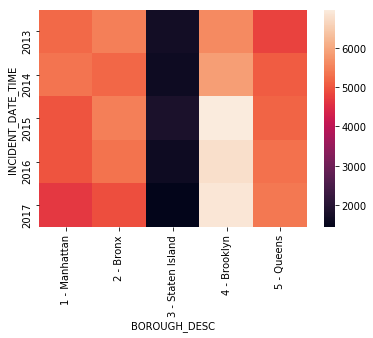

In [76]:
sns.heatmap(df.groupby([df.loc[df.INCIDENT_TYPE_DESC == "710 - Malicious, mischievous false call, other", 
       "INCIDENT_DATE_TIME"].dt.year.astype(str),
                        "BOROUGH_DESC"]).count()["FIRE_BOX"].unstack())

Let's explore which incidents happen between midnight and 4 AM, and how many units are usually sent to the scene in each borough

In [92]:
hour_type = df.groupby([df.loc[(df.INCIDENT_DATE_TIME.dt.hour >= 0) & (df.INCIDENT_DATE_TIME.dt.hour <= 4), 
                  "INCIDENT_DATE_TIME"].dt.hour.astype(str),
           df.loc[df.INCIDENT_TYPE_DESC.isin(df.INCIDENT_TYPE_DESC.value_counts().iloc[0:10].index), 
                  "INCIDENT_TYPE_DESC"]])

In [93]:
hour_type["UNITS_ONSCENE"].apply(lambda x: x.value_counts().index[0]).astype(int).unstack()

INCIDENT_TYPE_DESC,"113 - Cooking fire, confined to container","300 - Rescue, EMS incident, other",353 - Removal of victim(s) from stalled elevator,412 - Gas leak (natural gas or LPG),522 - Water or steam leak,"555 - Defective elevator, no occupants","651 - Smoke scare, odor of smoke","710 - Malicious, mischievous false call, other",735A - Unwarranted alarm/defective condition of alarm system,736 - CO detector activation due to malfunction
INCIDENT_DATE_TIME,,,,,,,,,,
0,6,1,1,5,1,1,5,1,3,2
1,6,1,1,5,1,1,5,1,3,2
2,6,1,1,5,1,1,5,1,3,2
3,6,1,1,5,1,1,5,1,3,2
4,6,1,1,5,1,1,5,1,3,2


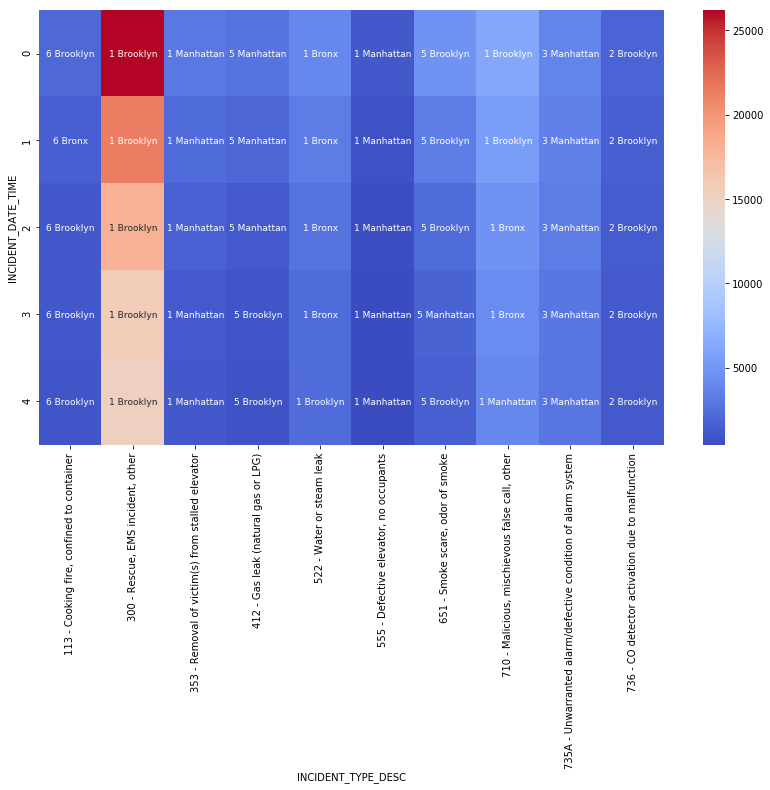

In [94]:
annot1 = hour_type["UNITS_ONSCENE"].apply(lambda x: x.value_counts().index[0]).unstack().values.astype(int).astype(str)
annot2 = hour_type["BOROUGH_DESC"].apply(lambda x: x.value_counts().index[0].split("-")[1]).unstack()
annotation = np.core.defchararray.add(annot1, annot2)
plt.figure(figsize = (14,8))
sns.heatmap(hour_type.count()["FIRE_BOX"].unstack(), cmap = "coolwarm", 
            annot = annotation, fmt = '', annot_kws={"size": 9})

Let's detect outliers

In [156]:
df_c = df.copy()
df_c = df_c.loc[df_c.TOTAL_INCIDENT_DURATION.notna()]
q1, q3= np.percentile(sorted(df_c.TOTAL_INCIDENT_DURATION),[25,75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)

In [159]:
df_c.loc[df_c.TOTAL_INCIDENT_DURATION > upper_bound].count().head(1)

IM_INCIDENT_KEY    205671
dtype: int64

__Is there any correlation between the time fdny arrives and the borough the incident has happened in?__

In [95]:
df_copied = df.copy()

In [96]:
(minutes >= 60).isna().sum()

0

In [97]:
df_copied["above60mArrival"] = (minutes >= 60)

In [98]:
df_copied.above60mArrival.value_counts()

False    2277241
True         525
Name: above60mArrival, dtype: int64

In [99]:
contingency_table = pd.crosstab(
    df_copied["above60mArrival"],
    df_copied["BOROUGH_DESC"],
    margins = True
)
contingency_table

BOROUGH_DESC,1 - Manhattan,2 - Bronx,3 - Staten Island,4 - Brooklyn,5 - Queens,All
above60mArrival,,,,,,
False,581969,456797,117479,661394,459602,2277241
True,163,92,28,98,144,525
All,582132,456889,117507,661492,459746,2277766


In [100]:
f_obs = np.array([contingency_table.iloc[0][0:-1].values,
                  contingency_table.iloc[1][0:-1].values])
f_obs

array([[581969, 456797, 117479, 661394, 459602],
       [   163,     92,     28,     98,    144]])

In [102]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(41.023205009472164, 2.6582570938804718e-08, 4)

__Is there any correlation between events that take more than 60 minutes and the presence or absence of CO detector?__

In [103]:
df_copied["above60mEvents"] = df_copied.TOTAL_INCIDENT_DURATION >= 3600

In [104]:
df_copied.above60mEvents.value_counts()

False    2170442
True      107324
Name: above60mEvents, dtype: int64

In [105]:
contingency_table = pd.crosstab(
    df_copied["above60mEvents"],
    df_copied["CO_DETECTOR_PRESENT_DESC"],
    margins = True
)
contingency_table

CO_DETECTOR_PRESENT_DESC,No,Yes,All
above60mEvents,,,
False,4785,23196,27981
True,859,835,1694
All,5644,24031,29675


In [106]:
f_obs = np.array([contingency_table.iloc[0][0:2].values,
                  contingency_table.iloc[1][0:2].values])
f_obs

array([[ 4785, 23196],
       [  859,   835]])

In [107]:
stats.chi2_contingency(f_obs)[0:3]

(1169.1529727007567, 3.085257737716545e-256, 1)

We can reject the null hypothesis that the presence or absence of CO detectors does not affect how long an incident takes to be resolved

__Classification__

In [108]:
df_class = df.copy()

In [109]:
df_class.loc[df_class.UNITS_ONSCENE == 1, "c_label"] = 1
df_class.loc[(df_class.UNITS_ONSCENE >= 2) & (df_class.UNITS_ONSCENE <= 10) , "c_label"] = 2
df_class.loc[(df_class.UNITS_ONSCENE > 10) , "c_label"] = 3

In [110]:
df_class.shape

(2277766, 25)

In [111]:
df_class.isna().sum()

IM_INCIDENT_KEY                       0
FIRE_BOX                              9
INCIDENT_TYPE_DESC                    0
INCIDENT_DATE_TIME                    0
ARRIVAL_DATE_TIME                 55218
UNITS_ONSCENE                     55412
LAST_UNIT_CLEARED_DATE_TIME           2
HIGHEST_LEVEL_DESC                  139
TOTAL_INCIDENT_DURATION             136
ACTION_TAKEN1_DESC                    0
ACTION_TAKEN2_DESC              1797072
ACTION_TAKEN3_DESC              2055715
PROPERTY_USE_DESC                     6
STREET_HIGHWAY                    38157
ZIP_CODE                              8
BOROUGH_DESC                          0
FLOOR                           1790363
CO_DETECTOR_PRESENT_DESC        2248091
FIRE_ORIGIN_BELOW_GRADE_FLAG    2275857
STORY_FIRE_ORIGIN_COUNT         2264648
FIRE_SPREAD_DESC                2264649
DETECTOR_PRESENCE_DESC          2264650
AES_PRESENCE_DESC               2264650
STANDPIPE_SYS_PRESENT_FLAG      2264646
c_label                           55412


NaN values for Total incident duration can be filled with the difference between INCIDENT_DATE_TIME and LAST_UNIT_CLEARED_DATE_TIME. There are 2 NaNs for LAST_UNIT_CLEARED_DATE_TIME column. Let's see if INCIDENT_DATE_TIME is also missing at those indices.

In [112]:
df_class.loc[(df_class.TOTAL_INCIDENT_DURATION.isna()) &
             (df_class.LAST_UNIT_CLEARED_DATE_TIME.isna())]

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG,c_label
2239941,62438552,4873,131 - Passenger vehicle fire,2017-12-03 21:35:04,2017-12-03 21:39:00,NaN,NaT,NaN,NaN,11 - Extinguishment by fire service personnel,...,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2239942,62438557,7404,131 - Passenger vehicle fire,2017-12-03 23:19:00,NaT,NaN,NaT,NaN,NaN,11 - Extinguishment by fire service personnel,...,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
df_class.drop([2239941, 2239942], inplace=True)

In [114]:
def duration(date1, date2):
    return (date2 - date1).astype('timedelta64[s]')

In [115]:
df_class.loc[df.TOTAL_INCIDENT_DURATION.isna(), "TOTAL_INCIDENT_DURATION"] = duration(df_class.loc[df_class.TOTAL_INCIDENT_DURATION.isna(), "INCIDENT_DATE_TIME"], 
         df_class.loc[df_class.TOTAL_INCIDENT_DURATION.isna(), "LAST_UNIT_CLEARED_DATE_TIME"])

In [116]:
df_class.isna().sum()

IM_INCIDENT_KEY                       0
FIRE_BOX                              9
INCIDENT_TYPE_DESC                    0
INCIDENT_DATE_TIME                    0
ARRIVAL_DATE_TIME                 55217
UNITS_ONSCENE                     55410
LAST_UNIT_CLEARED_DATE_TIME           0
HIGHEST_LEVEL_DESC                  137
TOTAL_INCIDENT_DURATION               0
ACTION_TAKEN1_DESC                    0
ACTION_TAKEN2_DESC              1797072
ACTION_TAKEN3_DESC              2055713
PROPERTY_USE_DESC                     6
STREET_HIGHWAY                    38157
ZIP_CODE                              6
BOROUGH_DESC                          0
FLOOR                           1790361
CO_DETECTOR_PRESENT_DESC        2248089
FIRE_ORIGIN_BELOW_GRADE_FLAG    2275855
STORY_FIRE_ORIGIN_COUNT         2264646
FIRE_SPREAD_DESC                2264647
DETECTOR_PRESENCE_DESC          2264648
AES_PRESENCE_DESC               2264648
STANDPIPE_SYS_PRESENT_FLAG      2264644
c_label                           55410


In [124]:
df_class["month"] = df_class.INCIDENT_DATE_TIME.dt.month

In [125]:
df_class.drop(["STANDPIPE_SYS_PRESENT_FLAG", "AES_PRESENCE_DESC", "DETECTOR_PRESENCE_DESC",
              "FIRE_SPREAD_DESC", "STORY_FIRE_ORIGIN_COUNT", "FIRE_ORIGIN_BELOW_GRADE_FLAG",
              "CO_DETECTOR_PRESENT_DESC", "FLOOR", "ACTION_TAKEN3_DESC", "ACTION_TAKEN2_DESC",
              "STREET_HIGHWAY", "ARRIVAL_DATE_TIME", "LAST_UNIT_CLEARED_DATE_TIME", 
              "IM_INCIDENT_KEY", "ZIP_CODE", "FIRE_BOX", 
               "PROPERTY_USE_DESC", "UNITS_ONSCENE", "ACTION_TAKEN1_DESC",
               "TOTAL_INCIDENT_DURATION", "INCIDENT_DATE_TIME"],
             axis = 1, inplace=True)

In [126]:
df_class.isna().sum()

INCIDENT_TYPE_DESC        0
HIGHEST_LEVEL_DESC      137
BOROUGH_DESC              0
c_label               55410
month                     0
dtype: int64

In [127]:
df_class = df_class.loc[df_class.HIGHEST_LEVEL_DESC.notna()]
df_class = df_class.loc[df_class.c_label.notna()]

In [23]:
df_class.isna().sum()

INCIDENT_TYPE_DESC    0
HIGHEST_LEVEL_DESC    0
BOROUGH_DESC          0
c_label               0
month                 0
dtype: int64

In [112]:
df_class.drop("UNITS_ONSCENE", axis = 1, inplace=True)

In [24]:
df_class_final = pd.get_dummies(df_class.drop("c_label", axis = 1)
                                , columns = ['INCIDENT_TYPE_DESC',
                                             'HIGHEST_LEVEL_DESC', 'BOROUGH_DESC', 'month'], 
                                drop_first=True)

In [25]:
df_class_final.shape

(2222336, 202)

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca.fit(df_class_final)
x_pca = pca.transform(df_class_final)

In [27]:
pca.explained_variance_ratio_[0:30].sum()

0.9296418164198862

In [28]:
from sklearn.model_selection import train_test_split
y = df_class.c_label
X = x_pca
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [30]:
y.value_counts()

1.0    1324235
2.0     890558
3.0       7543
Name: c_label, dtype: int64

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)

In [32]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
y_pred = rfc.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('classification report: \n', classification_report(y_test, y_pred))

Confusion Matrix: 
 [[368501  28431      3]
 [ 37886 228592   1029]
 [    37    403   1819]]
classification report: 
               precision    recall  f1-score   support

         1.0       0.91      0.93      0.92    396935
         2.0       0.89      0.85      0.87    267507
         3.0       0.64      0.81      0.71      2259

   micro avg       0.90      0.90      0.90    666701
   macro avg       0.81      0.86      0.83    666701
weighted avg       0.90      0.90      0.90    666701



__CONCLUSION__

- The code "300 - Rescue, EMS incident, Other" is the most frequent incident for all boroughs, and Brooklyn has the highest number of incidents.

- Year 2015 has seen highest number of incidents, and July is the busiest month for FDNY

- In Queens, people are less likely to get trapped inside an elevator compared to other boroughs

- There are some incidents with arrival time sooner than the time of incident

- Longest time to arrive to an incident scene was 7 days for a malicious, mischievous false call

- We found correlation between how long it takes FDNY to arrive on scene and the borough the incident has taken place. We also found correlation between the presence and absence of CO detector and total incident duration above 60 minutes

- We removed missing values and tried one-hot encoding for the relevant features to predict the number of units FDNY needs to send to resolve the issue (1 unit vs a team of 2 to 10 units vs a team of more than 10 units). We used Random Forest Classifier and what we found was a decent classification algorithm that can predict incidents needing 1 unit with 92% accuracy, incidents which need a team of 2 to 10 units with 87% accuracy, and incidents which need more than 10 units with 71% accuracy.